In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from umap import UMAP

import sys
sys.path.insert(0, "..")   
from src.utils import load_embeddings_pair, UMAP_reduce, tSNE_reduce, stack_embeddings
from src.plot_util import plot_low_dim_panels

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
proteinclip_df = load_embeddings_pair("../output/data/proteinclip_structural_split_train_with_embeddings.csv")
esmv1_df = load_embeddings_pair("../output/data/esmv1_structural_split_train_with_embeddings.csv")
esmv2_df = load_embeddings_pair("../output/data/esm2_t33_650M_UR50D_structural_split_train_with_embeddings.csv")
mutaplm_df = load_embeddings_pair("../output/data/mutaplm_structural_split_train_with_embeddings.csv")

In [4]:
print(proteinclip_df['protein1_embedding'].iloc[0].shape)
print(esmv1_df['protein1_embedding'].iloc[0].shape)
print(esmv2_df['protein1_embedding'].iloc[0].shape)
print(mutaplm_df['protein1_embedding'].iloc[0].shape)

(128,)
(1280,)
(1280,)
(4096,)


In [5]:
esmv1_df.iloc[10:,11]

10      [-0.6309643, 0.2031431, -0.48043844, 0.271446,...
11      [-0.2412799, 0.22559428, -0.29401976, -0.08504...
12      [-0.03328724, 0.2598753, -0.12208852, -0.07293...
13      [0.011510702, -0.006058493, -0.23428139, 0.051...
14      [0.01338504, 0.0894772, -0.048774704, 0.104724...
                              ...                        
1995    [-0.021220611, 0.13680503, -0.12531759, -0.008...
1996    [-0.041606724, 0.13133164, -0.1034366, -0.0071...
1997    [-0.09819674, 0.17200938, -0.27705428, -0.0114...
1998    [-0.04022965, 0.07760094, -0.25560445, -0.0187...
1999    [0.031455286, 0.014400812, -0.047043394, 0.110...
Name: protein2_embedding, Length: 1990, dtype: object

In [6]:
proteinclip_embs, n1 = stack_embeddings(proteinclip_df)
esmv1_embs, n2 = stack_embeddings(esmv1_df)
esmv2_embs, n3 = stack_embeddings(esmv2_df)
mutaplm_embs, n4 = stack_embeddings(mutaplm_df)

In [7]:
print(n1, n2, n3, n4)

2000 2000 2000 2000


In [8]:
proteinclip_umap = UMAP_reduce(proteinclip_embs)
esmv1_umap = UMAP_reduce(esmv1_embs)
esmv2_umap = UMAP_reduce(esmv2_embs)
mutaplm_umap = UMAP_reduce(mutaplm_embs)


/Users/yvesgreatti/.pyenv/versions/bio/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/yvesgreatti/.pyenv/versions/bio/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/yvesgreatti/.pyenv/versions/bio/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/yvesgreatti/.pyenv/versions/bio/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


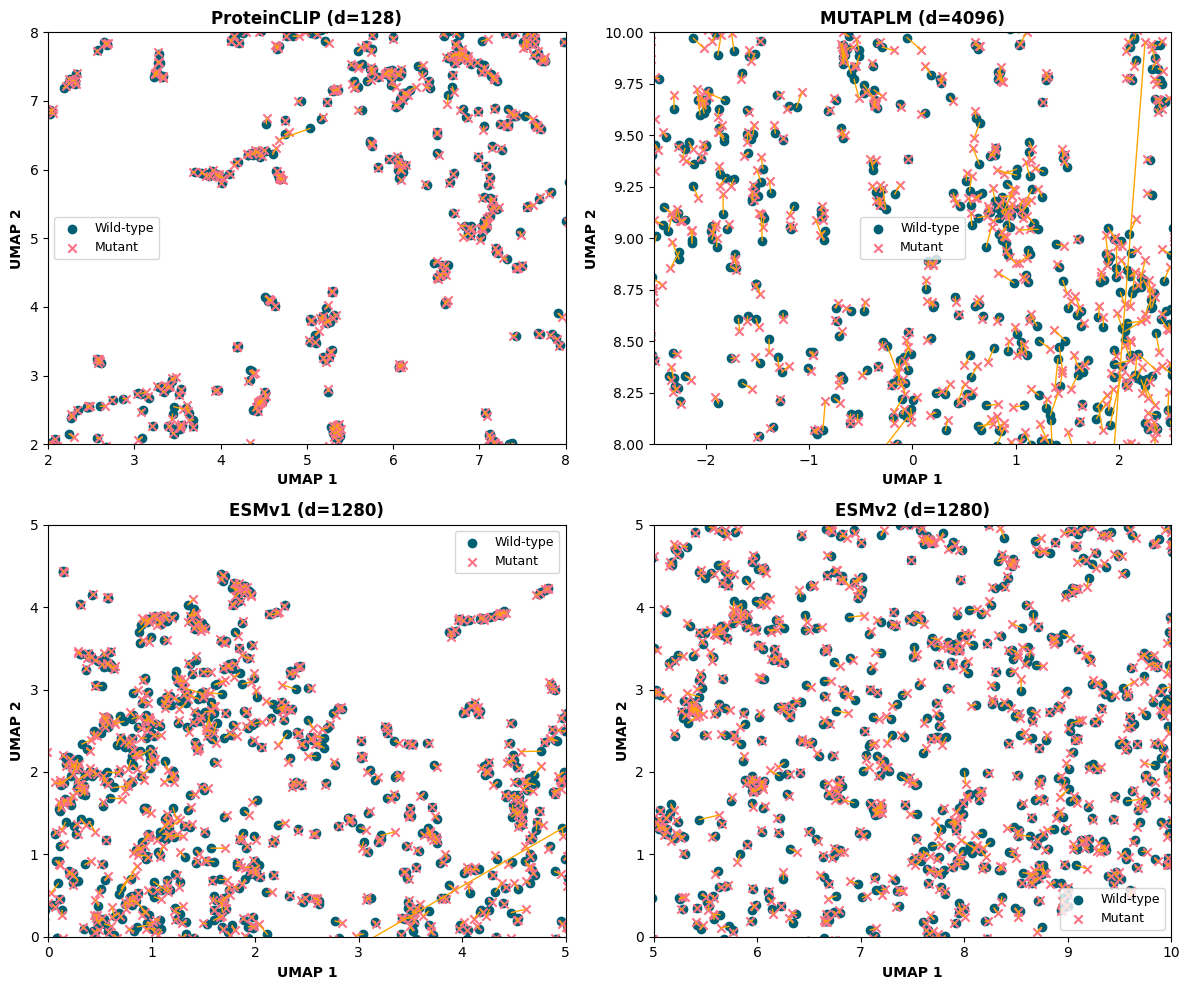

In [15]:
# four sets of embeddings
low_dim_sets = [
    (proteinclip_umap[:n1], proteinclip_umap[n1:]),
    (mutaplm_umap[:n4], mutaplm_umap[n4:]),
    (esmv1_umap[:n2], esmv1_umap[n2:]),
    (esmv2_umap[:n3], esmv2_umap[n3:]),
]

titles = ["ProteinCLIP (d=128)",  "MUTAPLM (d=4096)", "ESMv1 (d=1280)", "ESMv2 (d=1280)"]
xlims = [(2,8),(-2.5,2.5), (0,5), (5,10)]
ylims = [(2,8), (8,10), (0,5), (0,5)]
# xlims = [None,None, None, None]
# ylims = [None, None, None, None]

save_path = "../output/figure/2000_umap_4_models_wt_mutant_2.tiff"

plot_low_dim_panels(
    low_dim_sets,
    titles=titles,
    figsize=(12, 10),
    xlims=xlims,
    ylims=ylims,
    xticks=None,
    yticks=None,
    xlabel="UMAP 1",
    ylabel="UMAP 2",
    title_fontsize=12,
    label_fontsize=10,
    legend_fontsize=9,
    save_path=save_path,
    dpi=300,
)


In [32]:
proteinclip_df.columns

Index(['entry', 'protein2', 'uniprot_description', 'rank', 'protein1',
       'protein_name', 'function', 'GPT_description', 'all_description',
       'cosine_similarity', 'protein1_embedding', 'protein2_embedding'],
      dtype='object')

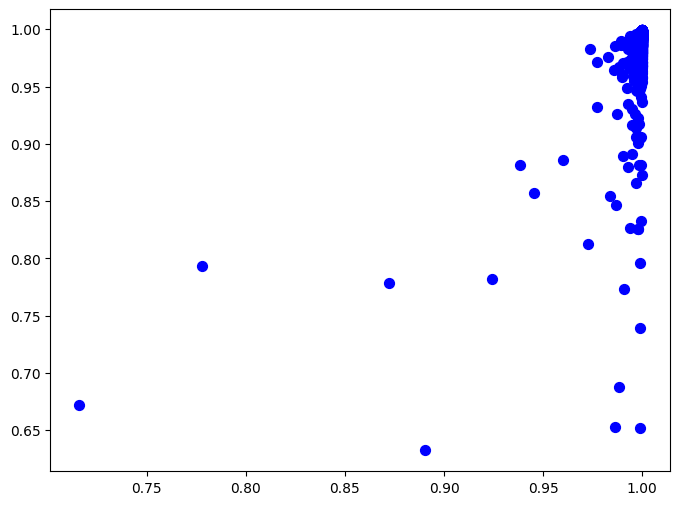

In [33]:

fig = plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    proteinclip_df['cosine_similarity'],
    mutaplm_df['cosine_similarity'],
    c="blue",
    s=50
)

In [31]:
# Step 1: Combine both sets of embeddings row-wise
protein1_embs = np.vstack(df["protein1_embedding"])
protein2_embs = np.vstack(df["protein2_embedding"])

# Step 2: Stack all embeddings vertically
all_embeddings = np.vstack([protein1_embs, protein2_embs])
combined_embeddings = np.hstack([protein1_embs, protein2_embs])  # shape: (2000, 640)
combined_embeddings.shape

(2000, 256)

In [32]:
# Stack protein1 and protein2 embeddings horizontally per row

# Run t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_coords = tsne.fit_transform(combined_embeddings)  # shape: (2000, 2)


In [33]:
tsne_coords.shape

(2000, 2)

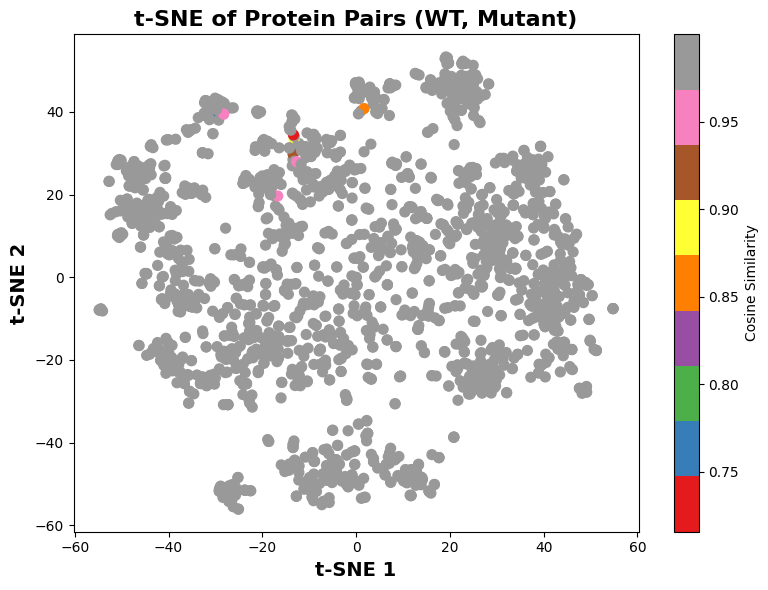

In [10]:
fig = plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    tsne_coords[:, 0],
    tsne_coords[:, 1],
    c=df["cosine_similarity"],
    cmap="Set1",
    s=50
)
plt.colorbar(scatter, label="Cosine Similarity")
plt.title("t-SNE of Protein Pairs (WT, Mutant)",fontsize=16, weight='bold')
plt.xlabel("t-SNE 1", fontsize=14, weight='bold')
plt.ylabel("t-SNE 2", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()
#fig.savefig("../output/figure/2000_tsne_wt_mutant_cos.tiff", dpi=300)
plt.close()
